In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [2]:
!pip install import_ipynb

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import import_ipynb
import func as fd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='/usr/share/fonts/nhn-nanum/NanumGothicBold.ttf').get_name()
rc('font', family=font_name)


importing Jupyter notebook from func.ipynb


In [4]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [491]:
from geoband.API import *

GetCompasData('PJT002_train.csv')
GetCompasData('PJT002_test.csv')
GetCompasData('PJT002_validation.csv')
GetCompasData('PJT002_submission.csv')

train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

In [492]:
train=fd.ar_pp(train)
val=fd.ar_pp(val)
#test=fd.ar_pp(test)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [493]:
c1 = train.columns[172:]
c2 = train.columns[137:151]
#c3 = train.columns[17:137]
X_train = train.drop(c1,1)
X_train = X_train.drop(c2,1)

X_val = val.drop(c1,1)
X_val = X_val.drop(c2,1)

test = test.drop(c1,1)
test = test.drop(c2,1)

y_train = X_train['fr_yn']
X_train = X_train.drop(['fr_yn', 'id'], 1)
y_val = X_val['fr_yn']
X_val = X_val.drop(['fr_yn', 'id'], 1)
test = test.drop(['fr_yn', 'id'], 1)

In [494]:
all_data = pd.concat([X_train, X_val, test],sort=False)

In [495]:
all_na = (all_data.isnull().sum() / len(all_data))*100
all_na = all_na[all_na<50]
all_na = all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : all_na})
missing_data.head(30)

,Missing Ratio
bldng_ar_prc,36.336912
bldng_us_clssfctn,29.916496
bldng_us,25.587935
bldng_archtctr,25.489945
ele_engry_us_201507,25.443081
gas_engry_us_201510,25.443081
ele_engry_us_201509,25.443081
gas_engry_us_201509,25.443081
ele_engry_us_201508,25.443081
gas_engry_us_201508,25.443081


Text(0.5, 1.0, 'Percent missing data by feature')

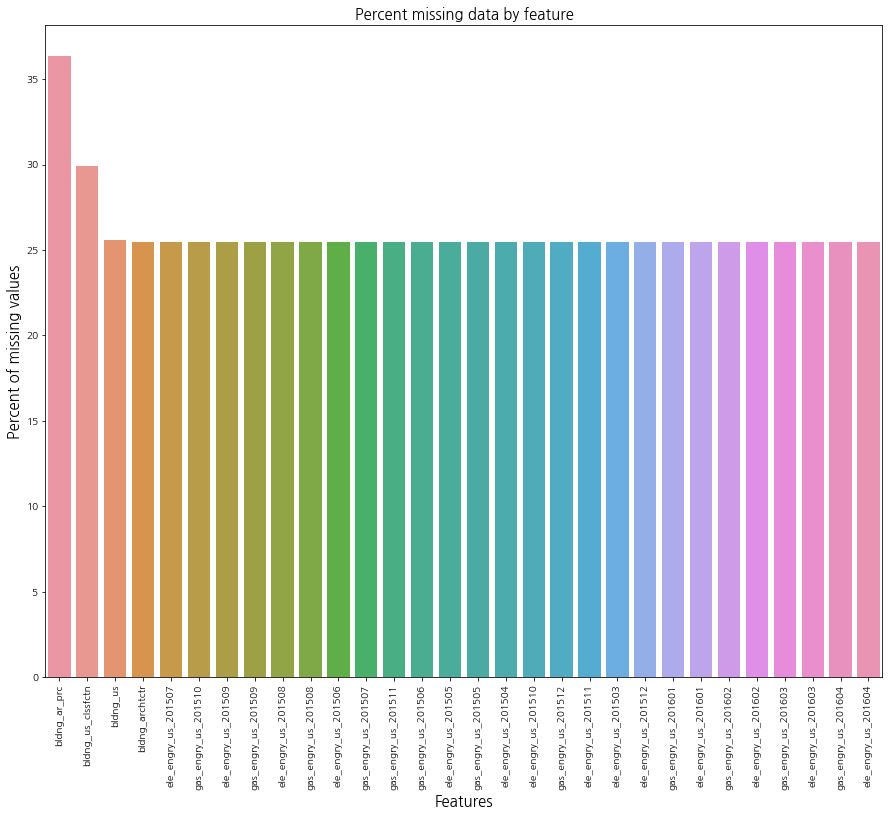

In [496]:
fig, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [497]:
all_data=fd.dt_of_fr_pp(all_data)
all_data=fd.dt_of_athrztn_pp(all_data)
all_data=fd.season_pp(all_data)
all_data=fd.flr_pp(all_data)
all_data=fd.fr_wthr_fclt_pp(all_data)
all_data=fd.bldng_clssfctn_pp(all_data)

all_data=fd.wnd_modi(all_data)
all_data=fd.prcpttn_modi(all_data)

/opt/app-root/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [498]:
train.fr_yn = train.fr_yn.map({'Y':1,'N':0})

In [499]:
train[['bldng_us', 'fr_yn']].groupby(['bldng_us'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

,bldng_us,fr_yn
11,묘지관련시설,1.000000
3,관광휴게시설,0.818182
6,교정및군사시설,0.750000
15,분뇨.쓰레기처리시설,0.739130
32,판매시설,0.714286
16,수련시설,0.700000
26,장례식장,0.666667
24,의료시설,0.666667
21,운수시설,0.666667
25,자동차관련시설,0.642857


In [500]:
all_data=fd.bldng_us_pp(all_data)

In [501]:
train[['bldng_archtctr', 'fr_yn']].groupby(['bldng_archtctr'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

,bldng_archtctr,fr_yn
13,철골철근콘크리트구조,0.675000
2,기타강구조,0.600000
11,일반철골구조,0.458450
14,철골콘크리트구조,0.458333
3,기타구조,0.444444
0,강파이프구조,0.428571
1,경량철골구조,0.416968
15,철근콘크리트구조,0.386968
17,프리케스트콘크리트구조,0.384615
4,기타조적구조,0.255319


In [502]:
all_data=fd.bldng_archtctr_pp(all_data)

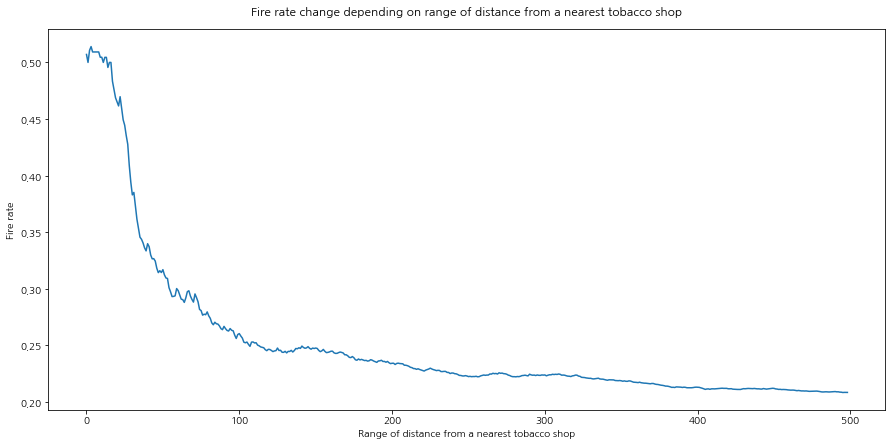

In [503]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn'].sum() / len(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of distance from a nearest tobacco shop', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest tobacco shop')
plt.show()

In [504]:
train['tbc_rtl_str_dstnc2'] = pd.qcut(train['tbc_rtl_str_dstnc'],4)
train[['tbc_rtl_str_dstnc2', 'fr_yn']].groupby(['tbc_rtl_str_dstnc2'], as_index=False).mean().sort_values(by='tbc_rtl_str_dstnc2', ascending=True)

,tbc_rtl_str_dstnc2,fr_yn
0,"(-0.001, 260.0]",0.223563
1,"(260.0, 534.0]",0.188437
2,"(534.0, 1852.0]",0.230568
3,"(1852.0, 23228.0]",0.209877


In [505]:
all_data=fd.tbc_pp(all_data)

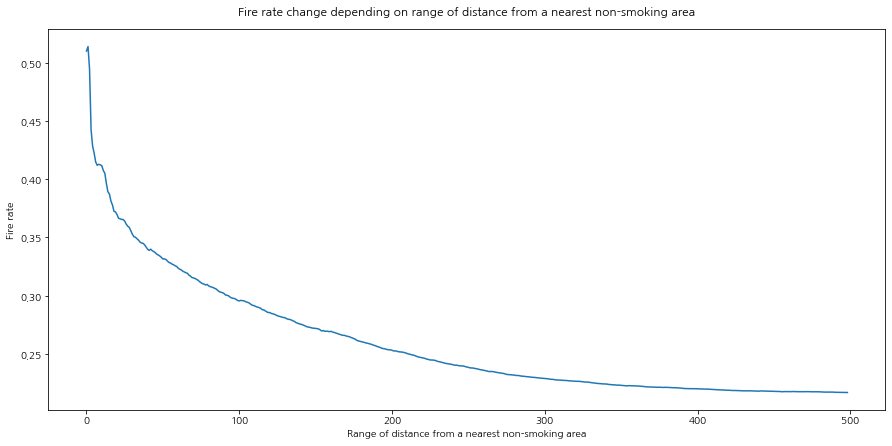

In [506]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['no_tbc_zn_dstnc'] < i]['fr_yn'].sum() / len(train[train['no_tbc_zn_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of distance from a nearest non-smoking area', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest non-smoking area')
plt.show()

In [507]:
train['no_tbc_zn_dstnc2'] = pd.qcut(train['no_tbc_zn_dstnc'],4)
train[['no_tbc_zn_dstnc2', 'fr_yn']].groupby(['no_tbc_zn_dstnc2'], as_index=False).mean().sort_values(by='no_tbc_zn_dstnc2', ascending=True)

,no_tbc_zn_dstnc2,fr_yn
0,"(-0.001, 39.0]",0.341802
1,"(39.0, 151.0]",0.200335
2,"(151.0, 457.0]",0.108970
3,"(457.0, 16164.0]",0.199905


/opt/app-root/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


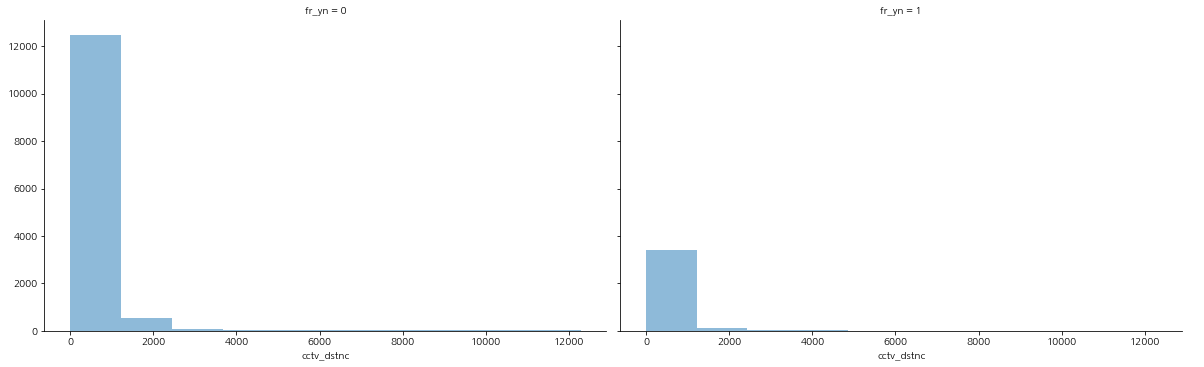

In [508]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'cctv_dstnc', alpha=.5, bins=10)
grid.add_legend()

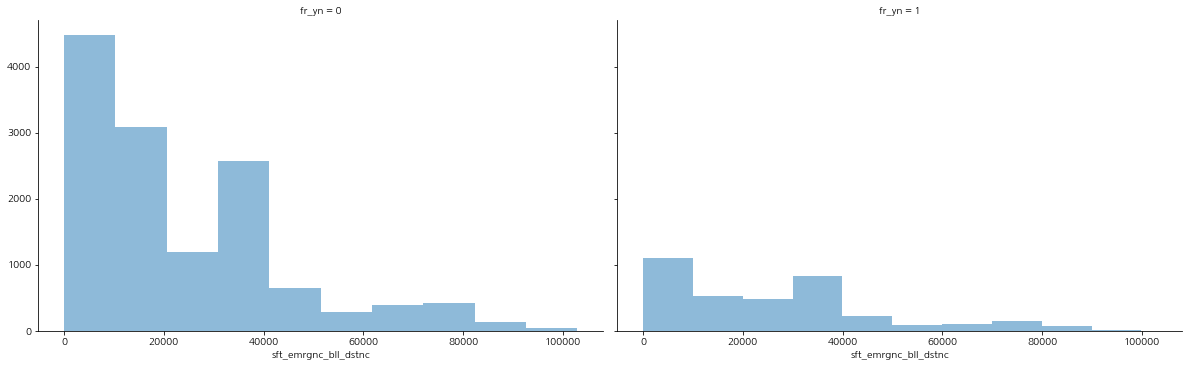

In [509]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'sft_emrgnc_bll_dstnc', alpha=.5, bins=10)
grid.add_legend()

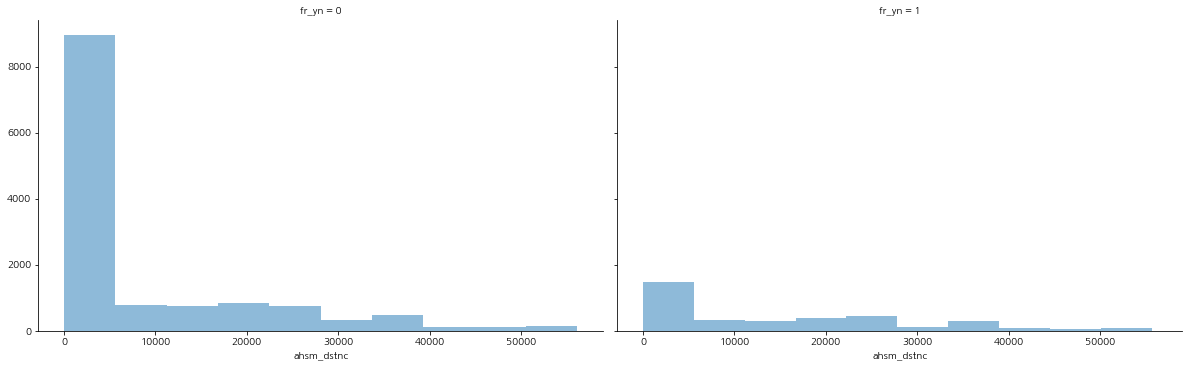

In [510]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'ahsm_dstnc', alpha=.5, bins=10)
grid.add_legend()

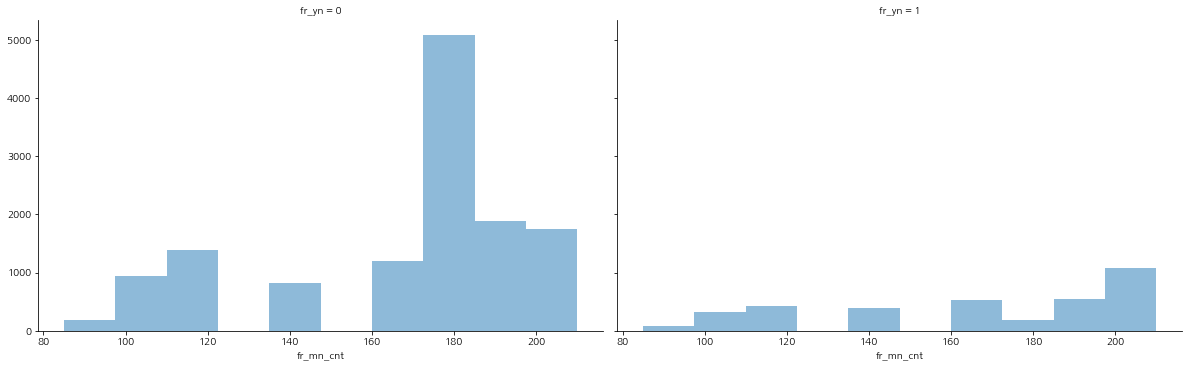

In [511]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'fr_mn_cnt', alpha=.5, bins=10)
grid.add_legend()

In [512]:
all_data.loc[all_data['rgnl_ar_nm2'].isnull(), 'rgnl_ar_nm2'] = '지정되지않음'

In [513]:
all_data=fd.rgnl_ar_nm_modi(all_data)

In [514]:
#all_data['rgnl_ar_nm'] = all_data['rgnl_ar_nm'].astype('category')  
# categorycal 타입으로 변경함

In [515]:
all_data=fd.lnd_us_sttn_nm_modi1(all_data)

In [516]:
all_data['lnd_us_sttn_nm'].unique()


array(['주거용', '상업.업무용', '주.상복합용', '전', '공업용', '특수토지', '공공용지', nan, '임야',
       '답', '기타', '경마장'], dtype=object)

In [517]:
all_data=fd.lnd_us_sttn_nm_modi2(all_data)

In [518]:
all_data=fd.emd_nm_modi(all_data)

In [519]:
all_data[['emd_nm','emd_nm_big','emd_nm_small']]

,emd_nm,emd_nm_big,emd_nm_small
2,창녕군 창녕읍,창녕군,창녕읍
5,창녕군 창녕읍,창녕군,창녕읍
7,창녕군 창녕읍,창녕군,창녕읍
12,창녕군 창녕읍,창녕군,창녕읍
13,창녕군 창녕읍,창녕군,창녕읍
...,...,...,...
2952,김해시 내외동,김해시,내외동
2953,김해시 진영읍,김해시,진영읍
2954,김해시 내외동,김해시,내외동
2955,김해시 삼안동,김해시,삼안동


In [520]:
all_data=fd.hm_cnt_modi(all_data)

In [521]:
all_data['hm_cnt'].isnull().sum()

49

In [522]:
all_data.loc[all_data['hm_cnt'].isnull(), 'emd_nm_small'] = round(all_data['hm_cnt'].mean())
# na값 인구 평균으로 치환

In [523]:
all_data['rd_sd_nm'].value_counts()

세로한면(가)    6409
소로한면       5991
세로한면(불)    2467
소로각지       2152
중로한면       1852
중로각지       1615
세로각지(가)     692
광대로한면       585
광대소각        578
맹지          163
세로각지(불)     104
광대세각         79
지정되지않음       55
Name: rd_sd_nm, dtype: int64

In [524]:
all_data.loc[all_data['rd_sd_nm'].isnull(), 'rd_sd_nm'] = '세로한면(가)'
# 최빈값으로 na 대체

In [525]:
all_data = all_data.drop('bldng_ar_prc', axis = 1)
# 건물가격 컬럼 삭제

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


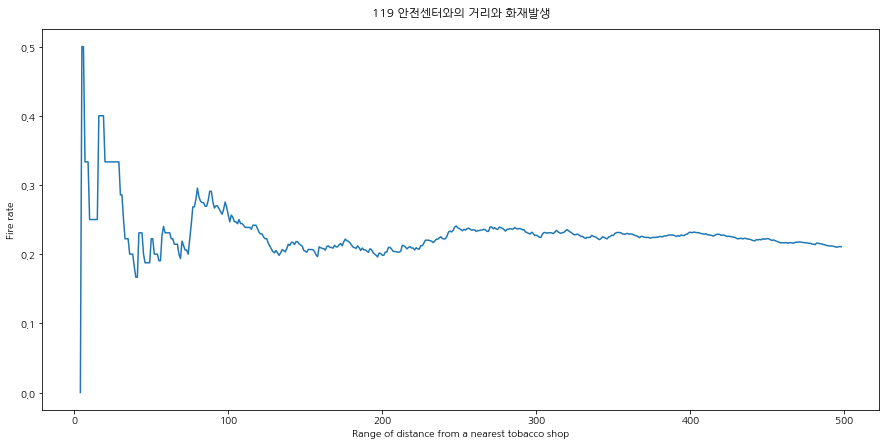

In [526]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['fr_sttn_dstnc'] < i]['fr_yn'].sum() / len(train[train['fr_sttn_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('119 안전센터와의 거리와 화재발생', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest tobacco shop')
plt.show()

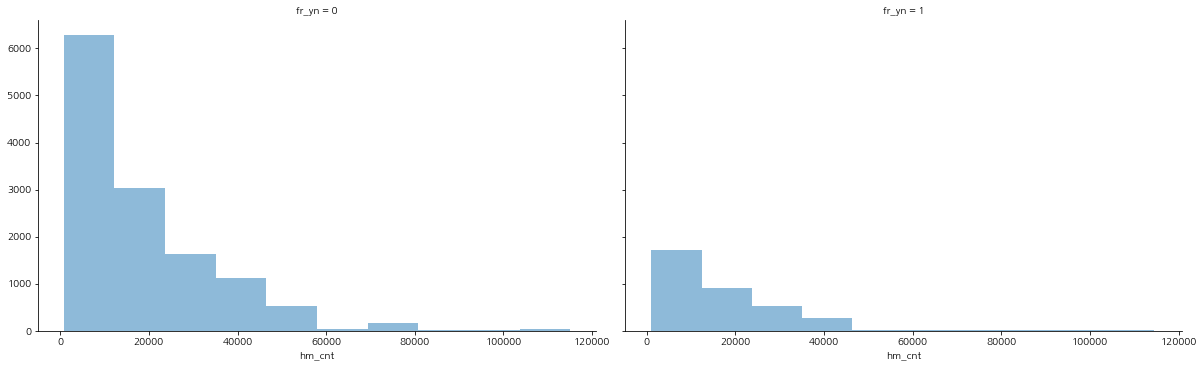

In [527]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'hm_cnt', alpha=.5, bins=10)
grid.add_legend()

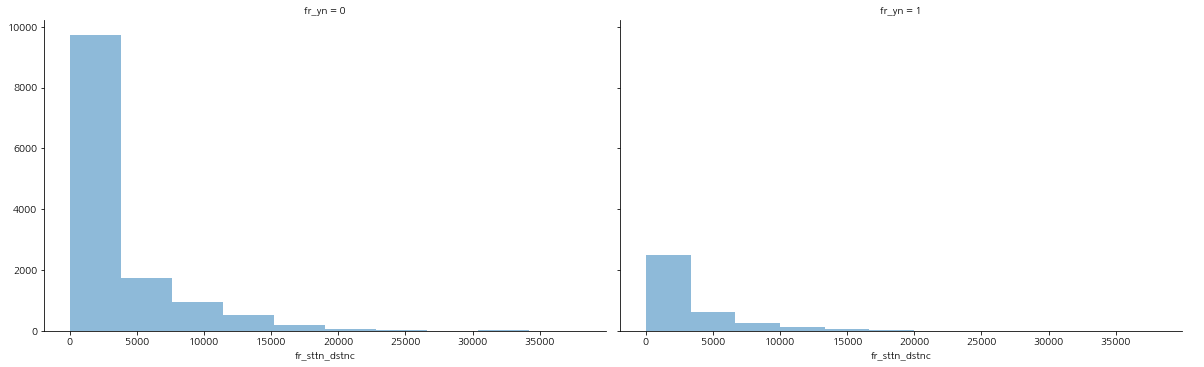

In [528]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'fr_sttn_dstnc', alpha=.5, bins=10)
grid.add_legend()

In [529]:
data=train

In [530]:
fd.dt_of_fr_pp(data)
fd.dt_of_athrztn_pp(data)
fd.season_pp(data)
fd.flr_pp(data)
fd.bldng_us_pp(data)
fd.bldng_archtctr_pp(data)
fd.fr_wthr_fclt_pp(data)
fd.tbc_pp(data)
fd.bldng_clssfctn_pp(data)
fd.ar_pp(data)
fd.rgnl_ar_nm_modi(data)
fd.lnd_us_sttn_nm_modi1(data)
fd.lnd_us_sttn_nm_modi2(data)
fd.emd_nm_modi(data)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,dt_of_fr_mth,season,mean_grndflr_per_bldng,mean_dwnflr_per_bldng,sum_grnd_dwn_flr,bldng_us2,bldng_archtctr2,legality,emd_nm_big,emd_nm_small
2,2016-10-30 14:57,1,공동주택,철근콘크리트구조,1,583.800,2516.7600,1446.0,20001104,5.0,...,10,가을,5.000000,0.000000,5.0,상대적분류,철골콘크리트구조,illegal,창녕군,창녕읍
5,2018-04-21 15:41,1,단독주택,철근콘크리트구조,1,96.660,149.0400,486.0,20150923,2.0,...,4,봄,2.000000,0.000000,2.0,상대적분류,철골콘크리트구조,illegal,창녕군,창녕읍
7,2018-03-03 23:11,0,단독주택,벽돌구조,6,92.000,92.0400,230.0,19941121,1.0,...,3,봄,0.166667,0.000000,1.0,상대적분류,석구조,illegal,창녕군,창녕읍
12,2017-07-17 13:15,1,공동주택,철근콘크리트구조,3,1046.400,12067.3800,230.0,19921224,17.0,...,7,여름,5.666667,0.333333,18.0,상대적분류,철골콘크리트구조,illegal,창녕군,창녕읍
13,2016-11-02 12:54,0,단독주택,철근콘크리트구조,1,44.220,129.5500,82.0,19940201,3.0,...,11,가을,3.000000,0.000000,3.0,상대적분류,철골콘크리트구조,legal,창녕군,창녕읍
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59185,2016-03-04 14:50,1,제2종근린생활시설,블록구조,4,241.420,457.2500,230.0,19921016,5.0,...,3,봄,1.250000,0.000000,5.0,상대적분류,석구조,legal,함안군,군북면
59186,2018-07-21 12:53,0,제2종근린생활시설,일반철골구조,1,151.000,171.2000,813.0,20140618,2.0,...,7,여름,2.000000,0.000000,2.0,상대적분류,철골콘크리트구조,illegal,함안군,칠서면
59187,2018-06-05 10:43,0,NaN,NaN,9,12144.580,12520.5300,0.0,0,5.0,...,6,여름,0.555556,0.000000,5.0,절대적분류,철골콘크리트구조,legal,함안군,법수면
59195,2016-10-29 10:10,0,NaN,NaN,35,5593.711,54835.0382,0.0,0,171.0,...,10,가을,4.885714,0.000000,171.0,절대적분류,철골콘크리트구조,legal,함안군,칠원읍


In [531]:
#건물 승인 연도별 시각화
data['blng_y']=data.loc[:,'dt_of_athrztn'].astype('str').str[:4]
data['blng_y']=data['blng_y'].astype('int')
data['bldng_y']=data['blng_y'].apply(lambda x: 1960 if (x>1959) & (x<1970) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 1970 if (x>1969) & (x<1980) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 1980 if (x>1979) & (x<1990) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 1990 if (x>1989) & (x<2000) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 2000 if (x>1999) & (x<2010) else x)
data['blng_y']=data['blng_y'].apply(lambda x: 2010 if (x>2009) & (x<2020) else x)

(1950, 2020)

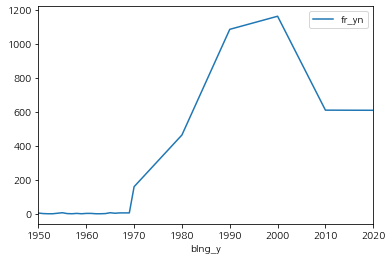

In [532]:
d1=data[['blng_y','fr_yn']]
d2=d1.set_index('blng_y')
d1=d1.pivot_table(index='blng_y', aggfunc='sum')
d2=d1.pivot_table(index='blng_y',aggfunc='sum')
d2.plot()
plt.xlim([1950,2020])

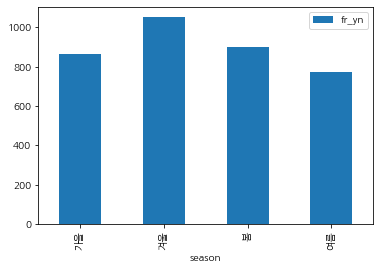

In [533]:
#계절별 화재빈도 시각화
df1=data[['fr_yn','season']]
df2=df1.set_index('season')
df2=df1.pivot_table(index='season', aggfunc='sum')
df2.plot.bar()

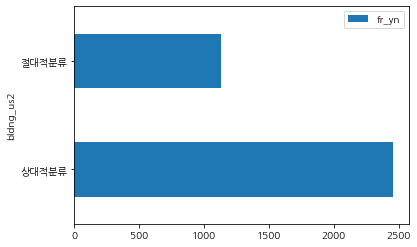

In [534]:
#건물용도별 화재 시각화
da1=data[['bldng_us2','fr_yn']]
da1.drop('fr_yn',axis=1)
da2=da1.pivot_table(index='bldng_us2', aggfunc='sum')
da2.plot.barh()

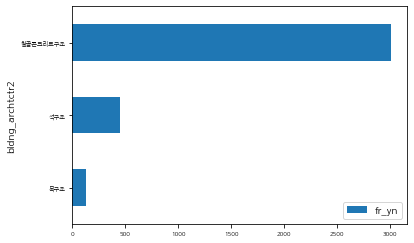

In [535]:
#건물구조별 화재 시각화
dq1=data[['bldng_archtctr2','fr_yn']]
dq2=dq1.pivot_table(index='bldng_archtctr2', aggfunc='sum')
dq2.plot.barh(fontsize=6)

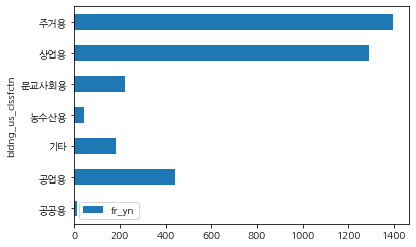

In [536]:
#건물 용도명 화재 시각화
dw1=data[['bldng_us_clssfctn','fr_yn']]
dw2=dw1.pivot_table(index='bldng_us_clssfctn', aggfunc='sum')
dw2.plot.barh()

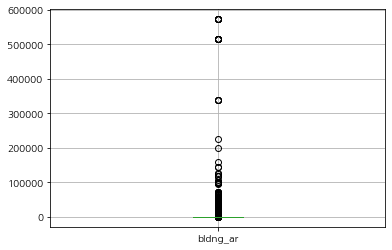

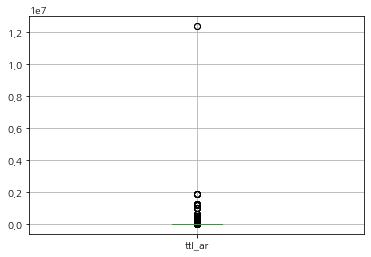

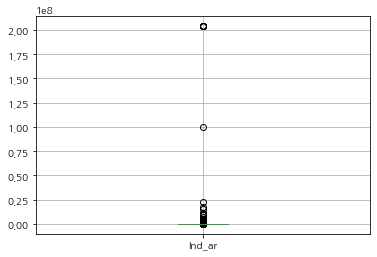

In [537]:
#건물 건축면적 data.bldng_ar    (건물 1층 바닥면적)
#건물 연면적 data.ttl_ar        (각 층 바닥면적의 합계)
#토지면적 data.lnd_ar           (집을 지을수 있는 땅)

data.boxplot(column=["bldng_ar"])     #이상치 값이 너무 높음 평균값 x -> 결측치 (중간값) 처리
plt.show()

data.boxplot(column=["ttl_ar"])
plt.show()

data.boxplot(column=["lnd_ar"])
plt.show()

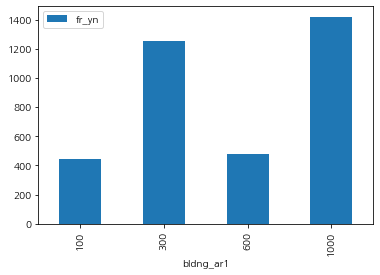

In [538]:
#건물면적 범위 화재 시각화 
data['bldnng_ar1']=data.loc[:,'dt_of_athrztn'].astype('str').str[:4]

data['bldng_ar1']=data['bldng_ar'].apply(lambda x: 100 if (x<101) else x)
data['bldng_ar1']=data['bldng_ar1'].astype('int')
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 300 if (x>=101) & (x<301)   else x)
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 600 if (x>=301) & (x<601)   else x)
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 1000 if (x>=601) & (x<1001) else x)
data['bldng_ar1']=data['bldng_ar1'].apply(lambda x: 1000 if(x>=1001) &(x>1000)  else x)

de1=data[['bldng_ar1','fr_yn']]
de2=de1.pivot_table(index='bldng_ar1', aggfunc='sum')
de2.plot.bar()

In [539]:
categorical_cols = all_data.select_dtypes(['object']).columns
for col in categorical_cols:
    all_data[col] = pd.Categorical(all_data[col]).codes

X_train = all_data[:len(train)]
X_val = all_data[len(train):-len(test)]
test = all_data[-len(test):]

In [540]:
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

In [541]:
from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred, pos_label='Y')

0.5774278215223096